In [31]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mp
import sklearn as sk
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_regression
import seaborn as sns



In [2]:
dfcsv=pd.read_csv("credit_immo.csv")
dfjson=pd.read_json("credit_immo.json")
dfxls=pd.read_excel("credit_immo.xls")

In [3]:
df = pd.DataFrame(np.random.randn(6, 4), columns=list(['taux_de_ventes','croissance_vente','ratio_benefice','ratio_perte']))


In [4]:
df



,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
0,-0.256399,-2.305441,1.215261,0.215273
1,1.443434,-1.036618,-1.237571,1.024350
2,0.362668,-0.056532,1.193421,0.470110
3,-0.326829,-0.908414,0.566191,-0.386496
4,-1.410104,0.213263,-0.529632,-0.916643
5,-0.362489,0.511206,1.189811,0.115458


In [5]:
df.reindex(range(0, 7))

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
0,-0.256399,-2.305441,1.215261,0.215273
1,1.443434,-1.036618,-1.237571,1.024350
2,0.362668,-0.056532,1.193421,0.470110
3,-0.326829,-0.908414,0.566191,-0.386496
4,-1.410104,0.213263,-0.529632,-0.916643
5,-0.362489,0.511206,1.189811,0.115458
6,NaN,NaN,NaN,NaN


In [6]:
df = df.reindex([1,2,3,4,5,6,7], fill_value=0)
print(df)

   taux_de_ventes  croissance_vente  ratio_benefice  ratio_perte
1        1.443434         -1.036618       -1.237571     1.024350
2        0.362668         -0.056532        1.193421     0.470110
3       -0.326829         -0.908414        0.566191    -0.386496
4       -1.410104          0.213263       -0.529632    -0.916643
5       -0.362489          0.511206        1.189811     0.115458
6        0.000000          0.000000        0.000000     0.000000
7        0.000000          0.000000        0.000000     0.000000


In [7]:
df.drop(7)

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
1,1.443434,-1.036618,-1.237571,1.024350
2,0.362668,-0.056532,1.193421,0.470110
3,-0.326829,-0.908414,0.566191,-0.386496
4,-1.410104,0.213263,-0.529632,-0.916643
5,-0.362489,0.511206,1.189811,0.115458
6,0.000000,0.000000,0.000000,0.000000


In [8]:
imputer = SimpleImputer(missing_values = np.nan,  
                        strategy ='mean') 
  


In [9]:
print(df)

   taux_de_ventes  croissance_vente  ratio_benefice  ratio_perte
1        1.443434         -1.036618       -1.237571     1.024350
2        0.362668         -0.056532        1.193421     0.470110
3       -0.326829         -0.908414        0.566191    -0.386496
4       -1.410104          0.213263       -0.529632    -0.916643
5       -0.362489          0.511206        1.189811     0.115458
6        0.000000          0.000000        0.000000     0.000000
7        0.000000          0.000000        0.000000     0.000000


In [10]:
dfcsv

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON
5,ETHAN,0.0,41,INTERIM,40000,1000,M,0.0,4.0,NON
6,LILIANE,-1.0,29,CDI,50000,3000,C,0.0,0.0,NON
7,GLODI,-3.0,24,INTERIM,29000,5000,C,0.0,0.0,NON
8,FLORIANE,NaN,26,CDI,44000,0,M,0.1,1.0,OUI
9,MARIE,3.0,37,CDI,45800,2000,M,0.2,2.0,OUI


In [11]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
SimpleImputer(dfcsv)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass missing_values=      ID_NOM  Niv_Etude_Bac  age contrat_de_travail  Salaire  \
0       jean            3.0   45                CDI    40000   
1    VANESSA            5.0   28                CDI    30500   
2   TARCISSE            0.0   55                CDI    28000   
3    TIBAULT            4.0   23                CDD    15000   
4      GILES            0.0   33                CDD    27000   
5      ETHAN            0.0   41            INTERIM    40000   
6    LILIANE           -1.0   29                CDI    50000   
7      GLODI           -3.0   24            INTERIM    29000   
8   FLORIANE            NaN   26                CDI    44000   
9      MARIE            3.0   37                CDI    45800   
10   BAKAMBU            2.0   40                CDI    60000   
11     FATOU            0.0   38                CDD    26000   
12      WUAN           -3.0   39            INTERIM    290

SimpleImputer(missing_values=      ID_NOM  Niv_Etude_Bac  age contrat_de_travail  Salaire  \
0       jean            3.0   45                CDI    40000   
1    VANESSA            5.0   28                CDI    30500   
2   TARCISSE            0.0   55                CDI    28000   
3    TIBAULT            4.0   23                CDD    15000   
4      GILES            0.0   33                CDD    27000   
5      ETHAN            0.0   41            INTERIM    40000   
6    LILIANE           -1.0   29                CDI    50000   
7      GLODI           -3.0   24            INTERIM    29000   
8   FLORIANE            NaN   26                CDI    44000   
9      MARIE            3.0   37                CDI    45800   
10   BAKAMBU            2.0   40                CDI    60000   
11     FATOU            0.0   38                CDD    26000   
12      WUAN           -3.0   39            INTERIM    2...
18  HOLLANDE            4.0   32                CDI    21000   

    dette_ante

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean", missing_values=np.nan)
imputer = imputer.fit(dfcsv[['enfant_a_Charge','Niv_Etude_Bac']])
dfcsv[['enfant_a_Charge','Niv_Etude_Bac']] = imputer.transform(dfcsv[['enfant_a_Charge','Niv_Etude_Bac']])
dfcsv

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.000000,45,CDI,40000,4000,M,0.3,3.000000,OUI
1,VANESSA,5.000000,28,CDI,30500,1320,M,0.1,0.000000,OUI
2,TARCISSE,0.000000,55,CDI,28000,40000,C,0.0,0.000000,NON
3,TIBAULT,4.000000,23,CDD,15000,0,M,0.1,1.333333,OUI
4,GILES,0.000000,33,CDD,27000,3000,C,0.1,2.000000,NON
5,ETHAN,0.000000,41,INTERIM,40000,1000,M,0.0,4.000000,NON
6,LILIANE,-1.000000,29,CDI,50000,3000,C,0.0,0.000000,NON
7,GLODI,-3.000000,24,INTERIM,29000,5000,C,0.0,0.000000,NON
8,FLORIANE,1.444444,26,CDI,44000,0,M,0.1,1.000000,OUI
9,MARIE,3.000000,37,CDI,45800,2000,M,0.2,2.000000,OUI


In [13]:
LabelEncoder().fit_transform(dfcsv['Niv_Etude_Bac'])
dfcsv['Niv_Etude_Bac']=LabelEncoder().fit_transform(dfcsv['Niv_Etude_Bac'])
LabelEncoder().fit_transform(dfcsv['contrat_de_travail'])
dfcsv['contrat_de_travail']=LabelEncoder().fit_transform(dfcsv['contrat_de_travail'])
dfcsv['etat_civile']=LabelEncoder().fit_transform(dfcsv['etat_civile'])

In [14]:
x=dfcsv.loc[:, "Niv_Etude_Bac" : "enfant_a_Charge"]
y=dfcsv.loc[:, "Solvable"]
xtrain, xtrain, ytest, ytest = train_test_split(x, y, train_size=0.2)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(xtrain)
print(xtrain)

    Niv_Etude_Bac  age  contrat_de_travail  Salaire  dette_anterieure  \
0               6   45                   1    40000              4000   
5               2   41                   3    40000              1000   
17              6   23                   1   100000                 0   
6               1   29                   1    50000              3000   
11              2   38                   0    26000              8000   
13              2   31                   1    43000            100000   
9               6   37                   1    45800              2000   
1               8   28                   1    30500              1320   
15              2   42                   2    70000             26000   
12              0   39                   3    29000              4900   
3               7   23                   0    15000                 0   
7               0   24                   3    29000              5000   
16              9   46                   1    80000

In [16]:
dfcsv1=pd.read_csv("../Montant_Temps.csv")


In [17]:
dfcsv1

,Montant_du_capitale,Temps
0,1,5
1,12,6
2,13,7
3,2,8
4,3,9
5,0,10
6,1,11
7,6,12
8,7,13
9,4,14


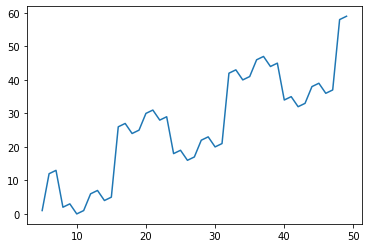

In [18]:
import matplotlib.pyplot as plt

plt.plot(dfcsv1['Temps'],dfcsv1['Montant_du_capitale'])



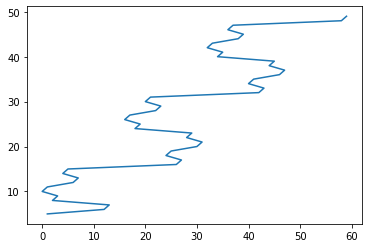

In [19]:
plt.plot(dfcsv1['Montant_du_capitale'],dfcsv1['Temps'])

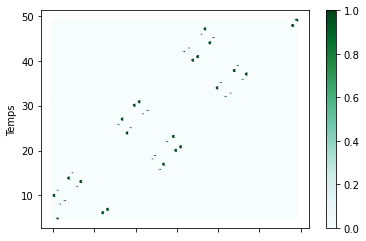

In [20]:
dfcsv1.plot(x="Montant_du_capitale",y="Temps", kind="hexbin")

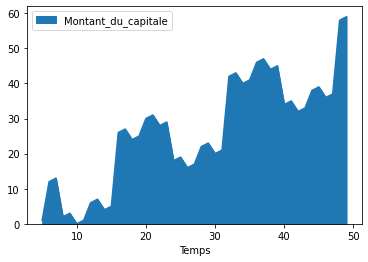

In [21]:
dfcsv1.plot(x="Temps",y="Montant_du_capitale", kind="area")

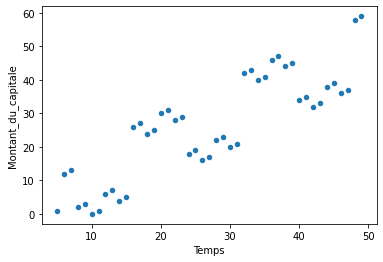

In [22]:
dfcsv1.plot(x="Temps",y="Montant_du_capitale", kind="scatter")

In [23]:
dfcsv2=pd.read_csv("../tendance_centrale.csv")

In [24]:
dfcsv2

,Nom,Age,Rating
0,ANATOLE,55,4.53
1,Vincent,59,3.54
2,Brenda,55,3.98
3,Philippe,53,5.59
4,Michel,30,3.50
5,Tillier,59,4.90
6,Blanchard,53,3.80
7,perez,34,3.78
8,théo,40,5.98
9,cyprien,30,4.80
